# Predicting Bitcoin Market Price.
This is a simple project trying to predict the market price of bitcoin using the estimated transaction volume of bitcoin in usd. Simple Linear Regression was employed. In this notebook, Linear Regression was coded from scratch and also Sklearn Libary was used for the regression, both answers from the two methods used came out to be the same. Model was tested using r2.      

In [1]:
#Import relevant libaries for the project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0,10.0)

In [2]:
#Read Data
data = pd.read_csv("bitcoin_dataset.csv")
data = data.dropna()

In [3]:
#Overview of Dataset
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23 00:00:00,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24 00:00:00,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0
2,2010-02-25 00:00:00,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,1057.142857,0.0,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0
3,2010-02-26 00:00:00,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,...,64.582059,0.0,176.0,176.0,43135.0,176.0,176.0,29349.0,13162.0,0.0
4,2010-02-27 00:00:00,0.0,2144750.0,0.0,0.0,0.0,0.000223,0.0,1.0,0.0,...,1922.222222,0.0,176.0,176.0,43311.0,176.0,176.0,9101.0,450.0,0.0


In [4]:
data.shape

(2899, 24)

In [5]:
#Dataset columns
for i in data.columns:
    print(i)

Date
btc_market_price
btc_total_bitcoins
btc_market_cap
btc_trade_volume
btc_blocks_size
btc_avg_block_size
btc_n_orphaned_blocks
btc_n_transactions_per_block
btc_median_confirmation_time
btc_hash_rate
btc_difficulty
btc_miners_revenue
btc_transaction_fees
btc_cost_per_transaction_percent
btc_cost_per_transaction
btc_n_unique_addresses
btc_n_transactions
btc_n_transactions_total
btc_n_transactions_excluding_popular
btc_n_transactions_excluding_chains_longer_than_100
btc_output_volume
btc_estimated_transaction_volume
btc_estimated_transaction_volume_usd


In [6]:
#More insight on Dataset
data.dtypes

Date                                                    object
btc_market_price                                       float64
btc_total_bitcoins                                     float64
btc_market_cap                                         float64
btc_trade_volume                                       float64
btc_blocks_size                                        float64
btc_avg_block_size                                     float64
btc_n_orphaned_blocks                                  float64
btc_n_transactions_per_block                           float64
btc_median_confirmation_time                           float64
btc_hash_rate                                          float64
btc_difficulty                                         float64
btc_miners_revenue                                     float64
btc_transaction_fees                                   float64
btc_cost_per_transaction_percent                       float64
btc_cost_per_transaction                               

In [7]:
#Convert Date column to Datatime object
data['Date'] = pd.to_datetime(data['Date'])

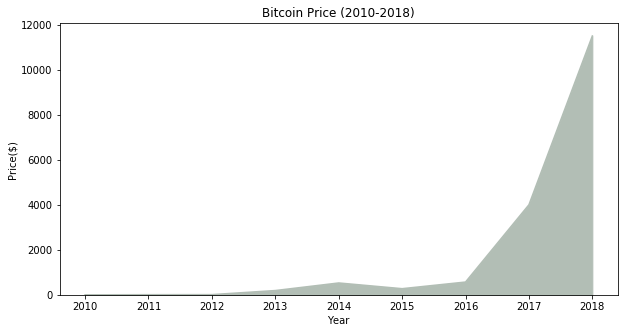

In [8]:
#Visualizing Bitcoin price from 2010 to 2018
data['Date_year'] = data.Date.dt.year
data.groupby('Date_year')['btc_market_price'].mean().plot(kind='area',figsize=(10,5),title="Bitcoin Price (2010-2018)",color='#b2beb5')
plt.xlabel('Year')
plt.ylabel('Price($)')
plt.show()


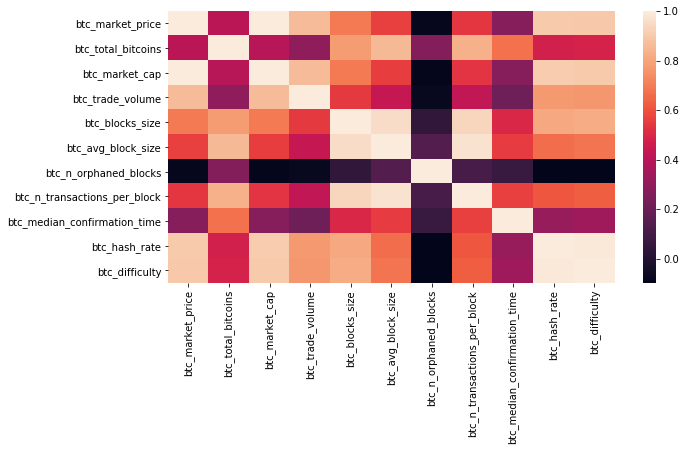

In [9]:
#Correlation among variables
plt.rcParams['figure.figsize'] = (10.0,5.0)
corr = data.iloc[:,1:12].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.show()

In [21]:
#Collecting X and Y

X = data['btc_estimated_transaction_volume_usd'].values
Y = data['btc_market_price'].values

### Linear Regression from scratch

In [23]:
#Mean of X and y
mean_of_X = np.mean(X)
mean_of_Y = np.mean(Y)

#Total number of values
n = len(X)

#Applying Linear regression  formular 
numer = 0
denom = 0
for i in range(n):
    numer += (X[i]-mean_of_X) * (Y[i]-mean_of_Y)
    denom += (X[i]-mean_of_X) ** 2
b1 = numer / denom
b0 = mean_of_Y - (b1 * mean_of_X)

print("b0: {}\n b1: {}".format(b0,b1))

b0: 70.07997780104108
 b1: 3.903108368726635e-06


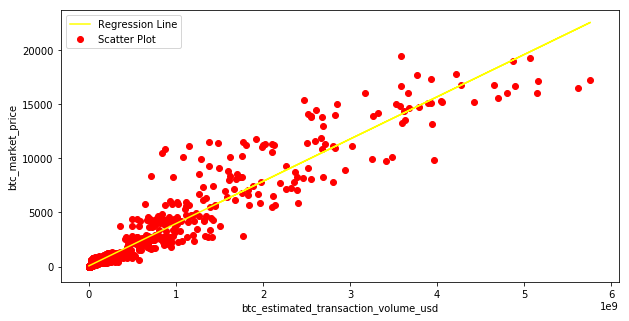

In [24]:
#Plotting Values and Regression Line
max_X = np.max(X) + 100
min_X = np.min(X) - 100

#Calculating line values x and y
x = X
y = b0 + b1 * x

#Plotting Line 
plt.plot(x,y, color = 'yellow', label='Regression Line')

#Plotting Scatter
plt.scatter(X,Y, color = 'red', label='Scatter Plot')

plt.xlabel('btc_estimated_transaction_volume_usd')
plt.ylabel('btc_market_price')
plt.legend()
plt.show()


In [25]:
#Calculating r2 of our model to see its performance
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i]-mean_of_Y) ** 2 
    ss_r += (Y[i]-y_pred) ** 2 
r2 = 1 - (ss_r/ss_t)
print('r2: {}'.format(r2))

r2: 0.921625322090048


### Linear Regression using SKlearn Library

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Reshape X
X = X.reshape(n,1)
#Creating model
lr = LinearRegression()
#Fitting data
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
#b0
lr.intercept_

70.07997780104108

In [28]:
#b1
lr.coef_

array([3.90310837e-06])

In [29]:
#r2
lr.score(X,Y)

0.921625322090048

#### Example: Given the highest estimated transaction volume of bitcoin in usd, what is the market price of bitcoin?

In [30]:
#Highest estimated transaction volume of bitcoin in usd
lr.predict(data['btc_estimated_transaction_volume_usd'].max())

array([22552.94145771])

Given the highest estimated transaction volume of bitcoin in usd, the market price of bitcoin is approx $22,553